Image Analysis Take Home Assignment- Question 1


Submitted by: Aayushi Pandey


SNR: 2038981

Part 1: Read in the image of coins you have been provided and display it with an appropriate title.

(-0.5, 3023.5, 4031.5, -0.5)

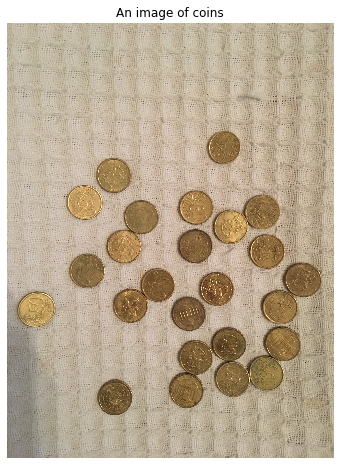

In [3]:
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon 
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, black_tophat
from skimage import img_as_float
from skimage import io,color
import numpy as np
from skimage.filters import threshold_otsu
from skimage.filters.rank import median
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects
from scipy.ndimage.morphology import binary_fill_holes


%matplotlib inline

im = io.imread("2038981/COINS_4202.jpg")
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.title("An image of coins")
plt.axis("off")

Part 2:  Display the red, blue and green channels in a subplot. Label each image with the color band.

(-0.5, 4031.5, 3023.5, -0.5)

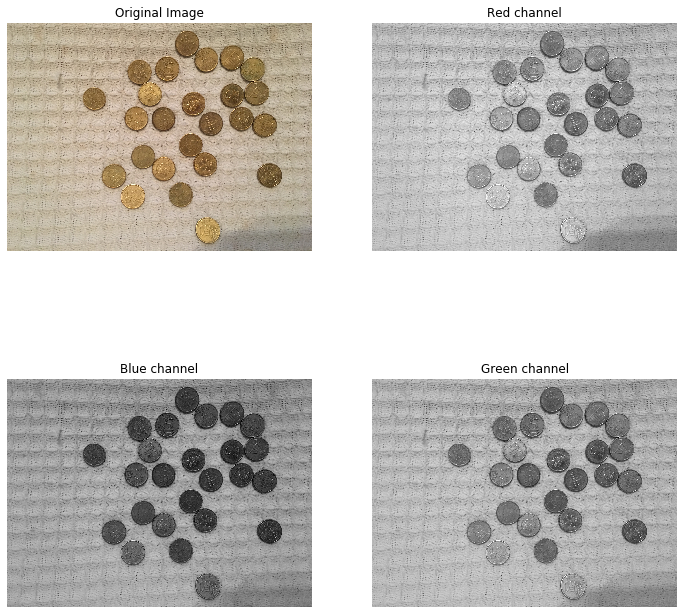

In [4]:
from PIL import Image

imPIL = Image.open("2038981/COINS_4202.jpg") 
im_red, im_green,im_blue = imPIL.split()

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(np.asarray(imPIL))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(np.asarray(im_red),cmap='gray') 
plt.title("Red channel")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(np.asarray(im_blue),cmap='gray')
plt.title("Blue channel")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(np.asarray(im_green),cmap='gray')
plt.title("Green channel")
plt.axis("off")

Part 3: Segment the coins to obtain a binary image where pixels representing the coins are set to 1. You should compare two image segmentation algorithms and you can apply morphological operations on these images.


In [5]:
# First method of segmentation: Some preprocessing followed by Otsu Global Thresholding, 
#with further processing with morphological operations

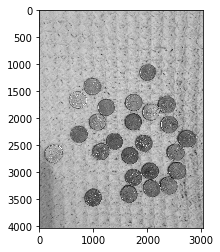

In [6]:
#Converting image to grayscale

im = color.rgb2gray(im)

im = im.astype(float)
im = im-im.min()
im = im/im.max()

plt.imshow(im, cmap = "gray")

Text(0.5, 1.0, 'Closing the image with a disk of radius 50')

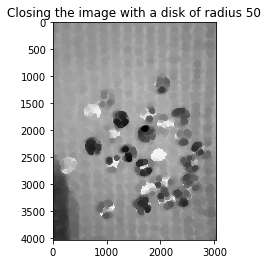

In [7]:
# I can clearly see that there is a shadow in the image. Hence to correct for that I want to do something very similar to 
# Black top hat filtering(because dark objects on a light background) 
# I will first apply closig to the image. 
# If I subtract the image directly from this result, almost all the detail fades away. 
# That is why, I blur the result of closing and then subtract the original image from this result to remove the shadow.


## Please be patient, this part of code takes around 15 mins to run :(
im2 = closing(im,disk(50))

plt.imshow(im2, cmap = "gray")
plt.title("Closing the image with a disk of radius 50")

(-0.5, 3023.5, 4031.5, -0.5)

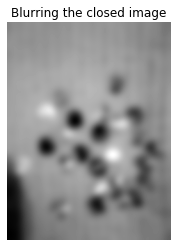

In [8]:
import scipy.ndimage.filters
imgGaussF = scipy.ndimage.gaussian_filter(im2, sigma=70)

plt.figure()
plt.imshow(imgGaussF, cmap = "gray")
plt.title("Blurring the closed image")
plt.axis("off")

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


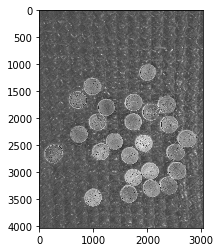

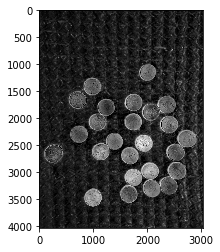

In [9]:
plt.figure()
plt.imshow(imgGaussF - im, cmap = "gray")
im3 = imgGaussF - im


im4 = median(im3, disk(5)) #To remove particle like noise
plt.figure() 
plt.imshow(im4, cmap = "gray")


(-0.5, 3023.5, 4031.5, -0.5)

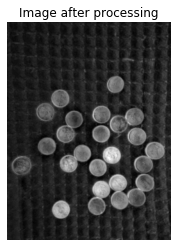

In [10]:
#Because background is still noisy, I apply smoothing again
plt.figure()
im5 = scipy.ndimage.gaussian_filter(im4, sigma=10) 
plt.imshow(im5,cmap = "gray") 
plt.title("Image after processing")
plt.axis("off")

(-0.5, 3023.5, 4031.5, -0.5)

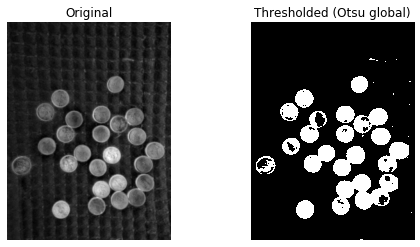

In [11]:
#Applying Global Thresholding

global_thresh = threshold_otsu(im5)
binary_global = im5 > global_thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(im5, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(binary_global, cmap=plt.cm.gray)
ax[1].set_title('Thresholded (Otsu global)')
ax[1].axis('off')



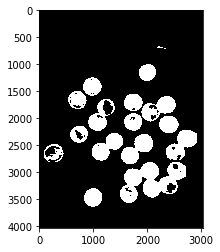

In [12]:
# Processing the segmented image further (image used is from global thresholding method)

binary_image = binary_global
im7 = remove_small_objects(binary_image, 2000, connectivity=1)

plt.figure()
plt.imshow(im7,cmap = "gray")

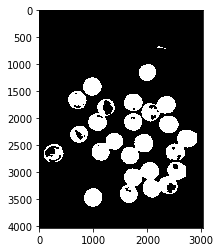

In [13]:
im8 = binary_closing(im7,disk(10))
plt.figure()
plt.imshow(im8,cmap="gray")

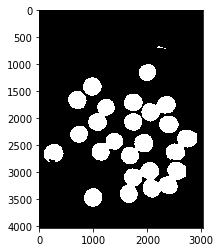

In [14]:
im9 = binary_fill_holes(im8, structure=np.ones((3,3)))

plt.figure()
plt.imshow(im9,cmap="gray")


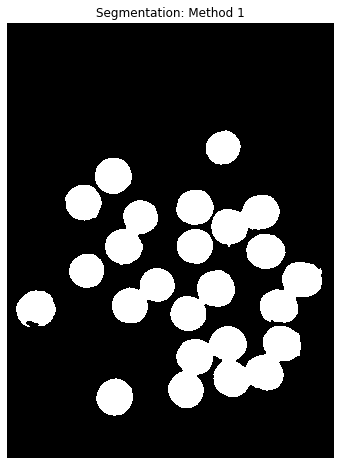

In [15]:
im10 = remove_small_objects(im9, 4000, connectivity=1)
plt.figure(figsize = (8,8))
plt.imshow(im10,cmap="gray")
plt.title("Segmentation: Method 1")
plt.axis("off")
final_binary_image = im10

In [16]:
#Segmentation Method 2: Some preprocessing followed by adaptive thresholding, followed by morphological operations

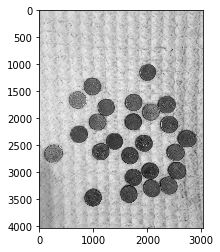

In [17]:
ima = io.imread("2038981/COINS_4202.jpg")

im2 = median(ima[:,:,2], disk(5)) #I take only the blue channel of the RGB image, and apply smoothing
plt.figure() 
plt.imshow(im2,cmap = "gray")

(-0.5, 3023.5, 4031.5, -0.5)

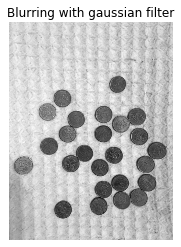

In [18]:
import scipy.ndimage.filters
imgGaussF = scipy.ndimage.gaussian_filter(im2, sigma= 3)

plt.figure()
plt.imshow(imgGaussF, cmap = "gray")
plt.title("Blurring with gaussian filter")
plt.axis("off")

(-0.5, 3023.5, 4031.5, -0.5)

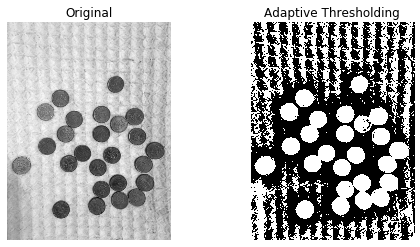

In [19]:
#Applying Adaptive thresholding

from skimage import filters

im0 = imgGaussF.astype(float)
im0 = im0-im0.min()
im0 = im0/im0.max()

block_size = 501
imbw = im0 < filters.threshold_local(im0, block_size, method = 'mean')

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(im0, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Adaptive Thresholding')
ax[1].axis('off')


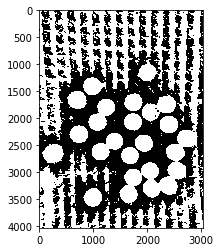

In [20]:
#Further morphological operations
im3 = binary_closing(imbw,disk(10))
plt.figure()
plt.imshow(im3, cmap = "gray")

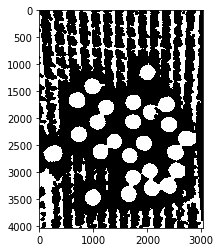

In [21]:
im4 = binary_erosion(im3, disk(20))
plt.figure()
plt.imshow(im4, cmap = "gray")

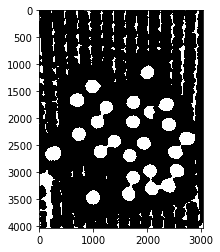

In [22]:
im4 = binary_erosion(im4,disk(20))
plt.figure()
plt.imshow(im4, cmap = "gray")

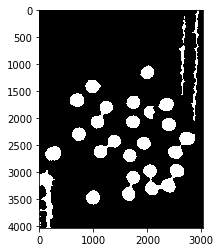

In [23]:
im5 = remove_small_objects(im4,25000, connectivity = 1)
plt.figure()
plt.imshow(im5, cmap = "gray")

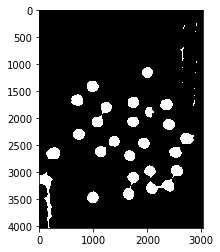

In [24]:
im6 = binary_erosion(im5,disk(20))
plt.figure()
plt.imshow(im6, cmap = "gray")

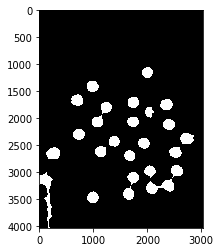

In [25]:
im7 = remove_small_objects(im6,10000, connectivity = 1)
plt.figure()
plt.imshow(im7, cmap = "gray")

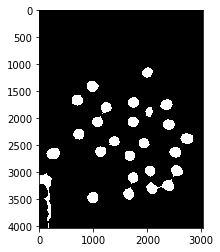

In [26]:
im8 = binary_erosion(im7,disk(5))
plt.figure()
plt.imshow(im8,cmap = "gray")

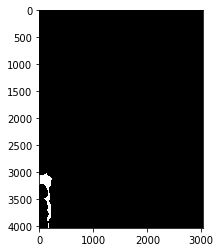

In [27]:
im9 = remove_small_objects(im8,75000, connectivity = 1)
plt.figure()
plt.imshow(im9, cmap = "gray")

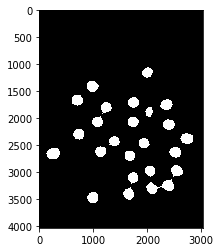

In [28]:
x = im8.astype(np.float32) - im9.astype(np.float32) 
x = x > 0 

plt.imshow(x,cmap= "gray")

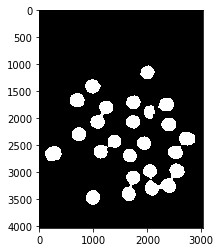

In [29]:
im10 = binary_dilation(x, disk(30))

plt.figure()
plt.imshow(im10, cmap = "gray")

Text(0.5, 1.0, 'Segmentation Method 2')

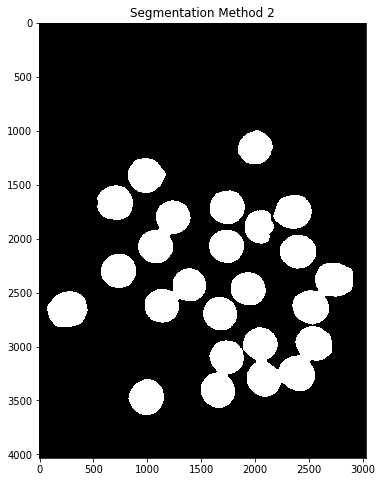

In [30]:
im11 = binary_dilation(im10, disk(30))

plt.figure(figsize = (8,8))
plt.imshow(im11, cmap = "gray")
plt.title("Segmentation Method 2")

Text(0.5, 1.0, 'Segmentation Method 2')

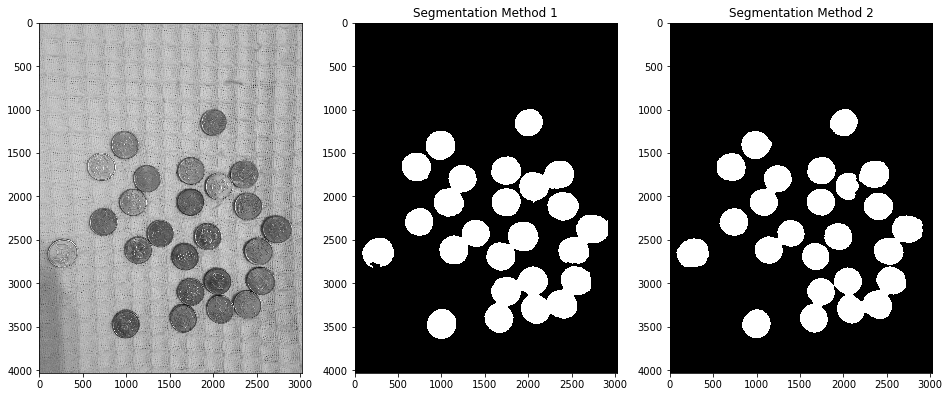

In [31]:
plt.figure(figsize = (16,16))

plt.subplot(1,3,1)
plt.imshow(im, cmap = "gray")

plt.subplot(1,3,2)
plt.imshow(final_binary_image, cmap = "gray")
plt.title("Segmentation Method 1")

plt.subplot(1,3,3)
plt.imshow(im11, cmap = "gray")
plt.title("Segmentation Method 2")


Comparison: Method 1: Otsu global thresholding with further processing gives me a better segmentation result, as connectivity remains intact 

Part 4:  Using the binary image as input, write code to output a new image containing (a) only the coins which overlap or touch each other (b) only non-overlapping coins


Text(0.5, 1.0, 'Only non overlapping coins')

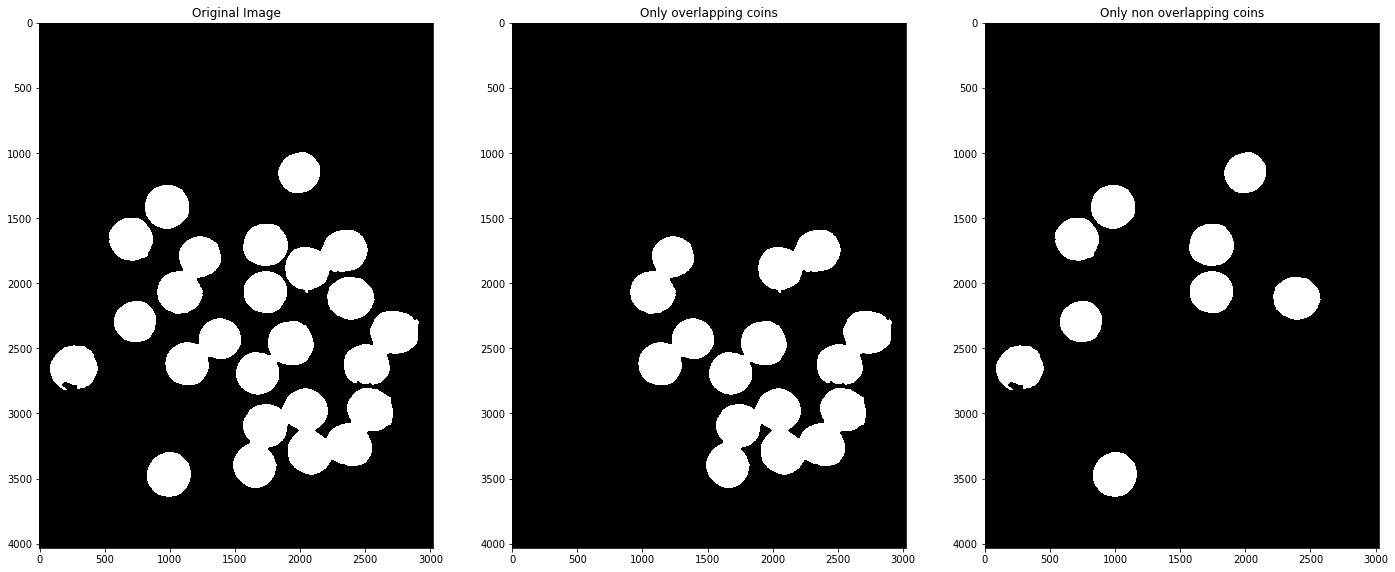

In [32]:
# I can try remove_small objects so that only the separate coins will be removed, while the joint ones can be retained

im11 = remove_small_objects(final_binary_image, 100000, connectivity=1)
x = final_binary_image.astype(np.float32) - im11.astype(np.float32) 
x = x > 0 #x is the binary image of only connected coins
plt.figure(figsize = (24,24))

plt.subplot(1,3,1)
plt.imshow(final_binary_image, cmap= "gray")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(im11,cmap= "gray")
plt.title("Only overlapping coins")

plt.subplot(1,3,3)
plt.imshow( x ,cmap="gray")
plt.title("Only non overlapping coins")




The above images show the desired result for part 4

Part 5:  Sets of white pixels which are connected to each other are called connected components or objects. Connect all the connected components and separate the touching coins objects.

Text(0.5, 1.0, 'Connected components of the image')

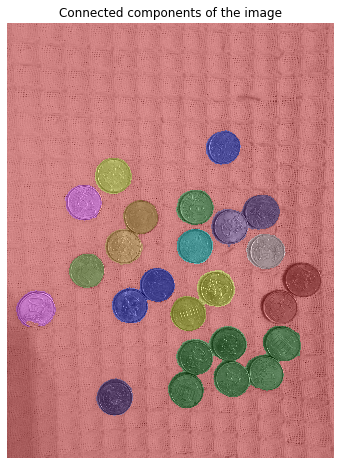

In [33]:
from skimage.measure import label, regionprops
from skimage import filters
from skimage.color import label2rgb

# connect the components 
label_img = label(final_binary_image)
image_label_overlay = label2rgb(label_img, image=im)

plt.figure(figsize = (8,8))
plt.imshow(image_label_overlay)
plt.axis('off')
plt.title('Connected components of the image')

(<matplotlib.axes._subplots.AxesSubplot at 0x23908cfa9e8>,
 (-0.5, 3023.5, 4031.5, -0.5),
 Text(0.5, 1.0, 'Image boundary'))

<Figure size 432x288 with 0 Axes>

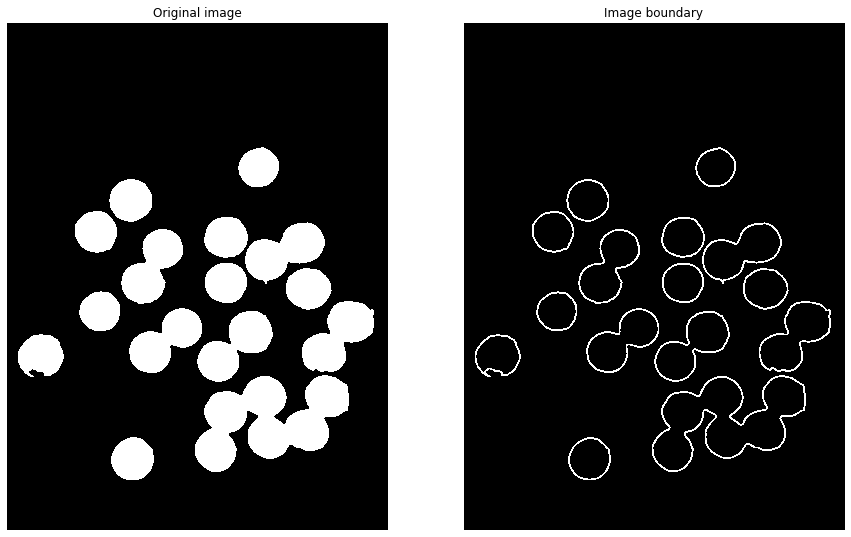

In [34]:
# Since there are some connected components, I can't very easily find the boundary of the image

# Finding boundaries of the coins
im_erode = binary_erosion(final_binary_image,disk(15))
#im_boundary = final_binary_image - im_erode
im_boundary = final_binary_image.astype(np.float32) - im_erode.astype(np.float32)
im_boundary = im_boundary > 0
plt.gray()
plt.figure(figsize = (15,12))
plt.subplot(121), plt.imshow(final_binary_image, cmap = "gray"), plt.axis('off'), plt.title('Original image')
plt.subplot(122), plt.imshow(im_boundary, cmap = "gray"), plt.axis('off'), plt.title('Image boundary')

#We can see that since the objects are connencted to each other, we can't use image - erosion to find boundaries of the coins

(-0.5, 3023.5, 4031.5, -0.5)

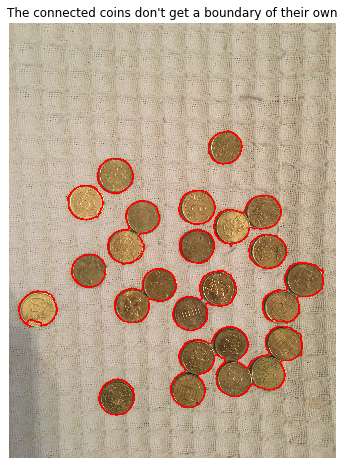

In [35]:
image = io.imread("2038981/COINS_4202.jpg")
image[im_boundary>0] = [255,0,0]
plt.figure(figsize = (8,8))
plt.imshow(image)
plt.title("The connected coins don't get a boundary of their own")
plt.axis("off")
#This doesn't seperated the connected coins

Text(0.5, 1.0, 'Separated objects')

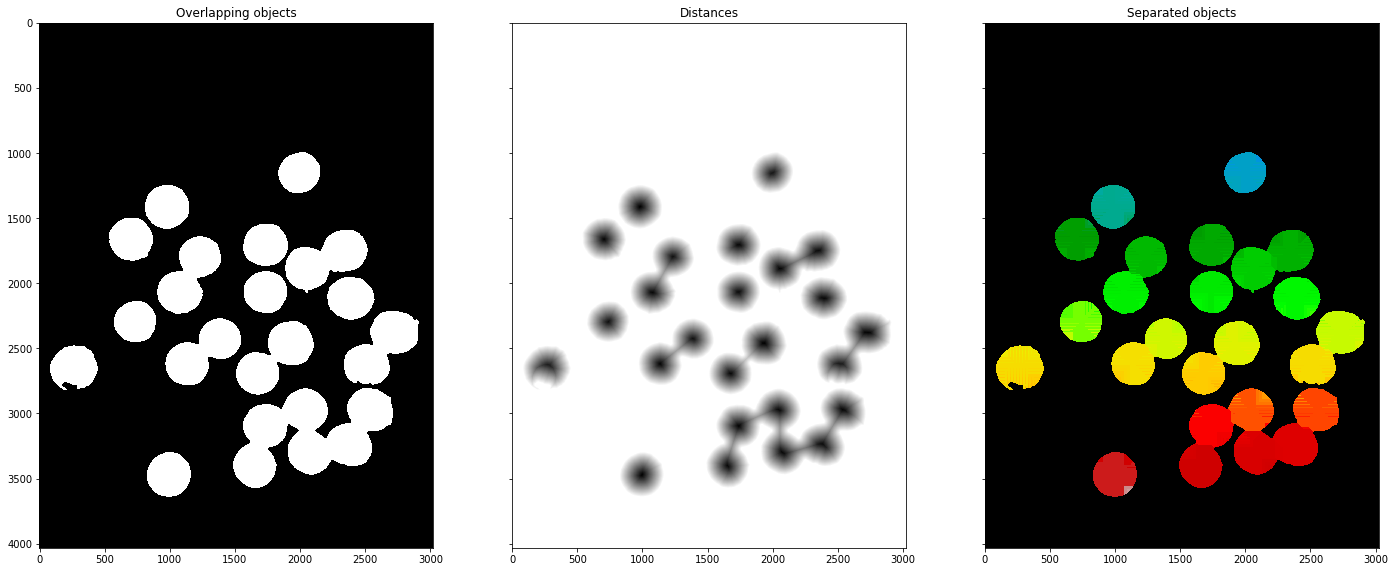

In [36]:
# I am using watersheds for making an attempt to seperate the connencted coins from each other
from random import seed

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max

distance = ndi.distance_transform_edt(final_binary_image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((25,25)), labels= final_binary_image)
markers = ndi.label(local_maxi)[0] #All markers are labelled differently

seed(0)
labels = watershed(-distance, markers = 4000, mask=final_binary_image)
# Rather than using markers from local maxi, I get a better result by setting a value through trial and error

# Display the results 
fig, axes = plt.subplots(ncols=3, figsize=(24, 24), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(final_binary_image, cmap= plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')



The above plots show how the overlapping coins are seperated using watershed segmentation

Part 6: Show your original image with an overlay of bounding boxes or circular boundaries of each object you found. List how many coins your code found.

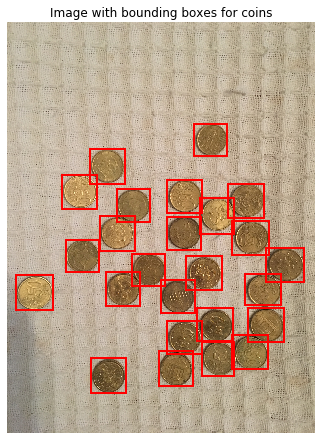

The number of coins in this image is 25


In [37]:
# I use the watershed result to answer the question

import matplotlib.patches as mpatches

image = io.imread("2038981/COINS_4202.jpg")
#image_label_overlay = label2rgb(labels, image=image)


fig, ax = plt.subplots(figsize=(10, 6))
#ax.imshow(image_label_overlay)
ax.imshow(image)

count_coins = 0
for region in regionprops(labels):
    # take regions with large enough areas
    if region.area >= 20000:
        count_coins = count_coins + 1
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.title("Image with bounding boxes for coins")
plt.show()

print("The number of coins in this image is {}".format(count_coins))
# Source: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html